## Real Estate Price Prediction - Bengaluru House Price Dataset

In this notebook we will do E.D.A. (Exploratory Data Analysis) and trainig on the Bengaluru House Price Dataset using sklearn libraries and matplotlib.

Sklearn is a library machine-learning and matplotlib is also a popular library for data visualization.

Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import re
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

Load data in dataframe df1

In [2]:
df1=pd.read_csv("../input/bengaluru-house-price-data/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Show data dimention

In [3]:
df1.shape

(13320, 9)

Group data by area type to get more information

In [4]:
df1.groupby("area_type").agg("count")
#df1.groupby("area_type")["area_type"].agg("count")

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


Check null values in data

In [5]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Drop availability column because its data won't help in our project. Drop society column because half of its data is null values.

In [6]:
df2=df1.drop(['availability','society'],axis='columns')
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


About balcon column, it has about 600 null values, so instead of drop these rows, will fill them with median of the column.

In [7]:
df2["balcony"]=df2["balcony"].fillna(int(df2["balcony"].median()))

Because the rest null values are not a lot comparing with the total amount of data, will drop them.

In [8]:
df3=df2.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

## clean size column.

size column has more than expression to show the house size(BHK,RK,bedroom).

In [9]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

What we need here is just the number of bedrooms.

In [10]:
df3["size"]=df3['size'].apply(lambda x: x.split(" ")[0])

In [11]:
df3['size'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

check the type of data

In [12]:
df3.dtypes

area_type      object
location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

convert data type of sizy, bath, and balcony

In [13]:
df3[['size','bath','balcony']]=df3[['size','bath','balcony']].apply(lambda x: x.astype("int32"))
#df3['total_sqft']=df3.total_sqft.astype("float")

Check houses have more than 10 bedrooms.

In [14]:
df3[df3["size"]>10]

,area_type,location,size,total_sqft,bath,balcony,price
459,Super built-up Area,1 Giri Nagar,11,5000,9,3,360.0
1718,Super built-up Area,2Electronic City Phase II,27,8000,27,0,230.0
1768,Plot Area,1 Ramamurthy Nagar,11,1200,11,0,170.0
3379,Super built-up Area,1Hanuman Nagar,19,2000,16,2,490.0
3609,Super built-up Area,Koramangala Industrial Layout,16,10000,16,2,550.0
3853,Plot Area,1 Annasandrapalya,11,1200,6,3,150.0
4684,Plot Area,Munnekollal,43,2400,40,0,660.0
4916,Super built-up Area,1Channasandra,14,1250,15,0,125.0
6533,Plot Area,Mysore Road,12,2232,6,2,300.0
7979,Super built-up Area,1 Immadihalli,11,6000,12,2,150.0


The houses that have more than 11 bedrooms look like an error, so will drop them.

In [15]:
df3=df3[df3["size"]<12]

## Clean total_sqft column

When convert total_sqft data typy to float, we find there is 190 values with charachters. We will take the average. of the range as total sqft.

In [16]:
# df3['total_sqft']=df3['total_sqft'].astype('float')

Find the average of the range in total_sqrt

In [17]:
df3[df3['total_sqft'].str.contains(" - ")]['total_sqft'].count()

144

In [18]:
df3[['min_total_sqft','max_total_sqft']]=df3['total_sqft'].str.split(" - ",expand=True)

In [19]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,min_total_sqft,max_total_sqft
0,Super built-up Area,Electronic City Phase II,2,1056,2,1,39.07,1056,None
1,Plot Area,Chikka Tirupathi,4,2600,5,3,120.00,2600,None
2,Built-up Area,Uttarahalli,3,1440,2,3,62.00,1440,None
3,Super built-up Area,Lingadheeranahalli,3,1521,3,1,95.00,1521,None
4,Super built-up Area,Kothanur,2,1200,2,1,51.00,1200,None


In [20]:
if df3['total_sqft'].str.contains(" - ") is True:
    df3['total_sqft']=(df3['min_total_sqft']+df3['max_total_sqft'])/2
else:
    df3['total_sqft']=df3['min_total_sqft']

Union the units to feet

In [21]:
df3['units']=df3['total_sqft'].str.extract(r"(\D{1,})",expand=True)
df3['total_Sqft']=df3['total_sqft'].str.extract(r"(\d{1,}[.]*\d{0,})",expand=True)

In [22]:
df3['units'].unique()

array([nan, '.', 'Perch', 'Sq. Meter', 'Sq. Yards', 'Acres', 'Cents',
       'Guntha', 'Grounds'], dtype=object)

In [23]:
df3['total_Sqft']=df3['total_Sqft'].astype('float')

In [24]:
df3.loc[(df3['units']=='Sq. Meter'),['total_Sqft']]=df3['total_Sqft']*10.7639
df3.loc[(df3['units']=='Perch'),['total_Sqft']]=df3['total_Sqft']*272.25
df3.loc[(df3['units']=='Sq. Yards'),['total_Sqft']]=df3['total_Sqft']*9
df3.loc[(df3['units']=='Acres'),['total_Sqft']]=df3['total_Sqft']*43560
df3.loc[(df3['units']=='Cents'),['total_Sqft']]=df3['total_Sqft']*435.56
df3.loc[(df3['units']=='Guntha'),['total_Sqft']]=df3['total_Sqft']*1089
df3.loc[(df3['units']=='Grounds'),['total_Sqft']]=df3['total_Sqft']*2400.35202372

In [25]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,min_total_sqft,max_total_sqft,units,total_Sqft
0,Super built-up Area,Electronic City Phase II,2,1056,2,1,39.07,1056,None,NaN,1056.0
1,Plot Area,Chikka Tirupathi,4,2600,5,3,120.00,2600,None,NaN,2600.0
2,Built-up Area,Uttarahalli,3,1440,2,3,62.00,1440,None,NaN,1440.0
3,Super built-up Area,Lingadheeranahalli,3,1521,3,1,95.00,1521,None,NaN,1521.0
4,Super built-up Area,Kothanur,2,1200,2,1,51.00,1200,None,NaN,1200.0


In [26]:
df3=df3.drop(['total_sqft','units','min_total_sqft','max_total_sqft'],axis='columns')

In [27]:
df3.head()

,area_type,location,size,bath,balcony,price,total_Sqft
0,Super built-up Area,Electronic City Phase II,2,2,1,39.07,1056.0
1,Plot Area,Chikka Tirupathi,4,5,3,120.00,2600.0
2,Built-up Area,Uttarahalli,3,2,3,62.00,1440.0
3,Super built-up Area,Lingadheeranahalli,3,3,1,95.00,1521.0
4,Super built-up Area,Kothanur,2,2,1,51.00,1200.0


In [28]:
df3.columns

Index(['area_type', 'location', 'size', 'bath', 'balcony', 'price',
       'total_Sqft'],
      dtype='object')

In [29]:
df3=df3.reindex(columns=['area_type', 'location', 'size' ,'total_Sqft','bath', 'balcony', 'price'])

In [30]:
df3=df3.rename(columns={'total_Sqft':'total_sqft','size':'bedrooms'})

In [31]:
df3['price']=df3['price']*100000

Create price_per_sqft column

In [32]:
df4=df3.copy()
df4['price_per_sqft']=df4['price']/df4['total_sqft']

In [33]:
df4

,area_type,location,bedrooms,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,3907000.0,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,12000000.0,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,6200000.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,9500000.0,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,5100000.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453.0,4,0,23100000.0,6689.834926
13316,Super built-up Area,Richards Town,4,3600.0,5,2,40000000.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2,1,6000000.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4,4689.0,4,1,48800000.0,10407.336319


## clean location column

In [34]:
df4.location=df4.location.apply(lambda x: x.strip())

In [35]:
location_state=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_state

location
Whitefield                     535
Sarjapur  Road                 392
Electronic City                304
Kanakpura Road                 266
Thanisandra                    236
                              ... 
1 Giri Nagar                     1
Karnataka Shabarimala            1
Kasthuri Nagar East Of NGEF      1
Kathriguppe IV Phase             1
whitefiled                       1
Name: location, Length: 1288, dtype: int64

find location_state that has number less than 11

In [36]:
location_state[location_state<=10].count()

1047

In [37]:
df4.location=df4.location.apply(lambda x: 'Other' if x in location_state[location_state<=10] else x)

Now we have 242 locations

In [38]:
location_state=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_state

location
Other               2875
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
                    ... 
Kodigehalli           11
LB Shastri Nagar      11
Marsur                11
Narayanapura          11
HAL 2nd Stage         11
Name: location, Length: 242, dtype: int64

## Outlaiers detection and removal

Detect if the house has a bedroom with sqft more than threshold (300sqft per room)

In [39]:
df5=df4.copy()
df5.shape

(13238, 8)

In [40]:
df5.head()

,area_type,location,bedrooms,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,3907000.0,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,12000000.0,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,6200000.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,9500000.0,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,5100000.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453.0,4,0,23100000.0,6689.834926
13316,Super built-up Area,Other,4,3600.0,5,2,40000000.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2,1,6000000.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4,4689.0,4,1,48800000.0,10407.336319


In [41]:
df5[(df5.total_sqft/df5.bedrooms)<300]

,area_type,location,bedrooms,total_sqft,bath,balcony,price,price_per_sqft
9,Plot Area,Other,6,1020.0,6,2,37000000.0,36274.509804
45,Plot Area,HSR Layout,8,600.0,9,2,20000000.0,33333.333333
58,Plot Area,Murugeshpalya,6,1407.0,4,1,15000000.0,10660.980810
68,Plot Area,Devarachikkanahalli,8,1350.0,7,0,8500000.0,6296.296296
70,Plot Area,Other,3,500.0,3,2,10000000.0,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,Other,7,1400.0,7,2,21800000.0,15571.428571
13279,Plot Area,Other,6,1200.0,5,2,13000000.0,10833.333333
13281,Plot Area,Margondanahalli,5,1375.0,5,1,12500000.0,9090.909091
13303,Plot Area,Vidyaranyapura,5,774.0,5,3,7000000.0,9043.927649


In [42]:
df6=df5.copy()


In [43]:
df6=df6[~((df6.total_sqft/df6.bedrooms)<300)]
df6.head()

,area_type,location,bedrooms,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,3907000.0,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,12000000.0,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,6200000.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,9500000.0,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,5100000.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453.0,4,0,23100000.0,6689.834926
13316,Super built-up Area,Other,4,3600.0,5,2,40000000.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2,1,6000000.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4,4689.0,4,1,48800000.0,10407.336319


## Check price_per_sqft column

In [44]:
df6.price_per_sqft.describe()

count     12479.000000
mean       6306.470554
std        4170.747768
min           2.257423
25%        4210.033972
50%        5297.297297
75%        6920.138889
max      176470.588235
Name: price_per_sqft, dtype: float64

In [45]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        std=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-std))&(subdf.price_per_sqft<=(m+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [46]:
df7=remove_pps_outliers(df6)

In [47]:
df7.shape

(10273, 8)

## Analyse the relation between the bedroom number and price

In [48]:
def scatter_chart(df,location):
    br2=df[(df.location==location)&(df.bedrooms==2)]
    br3=df[(df.location==location)&(df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(br2.total_sqft,br2.price,marker='o',color='b',label='2 Bedrooms',s=50)
    plt.scatter(br3.total_sqft,br3.price,marker='+',color='r',label='3 Bedrooms',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()


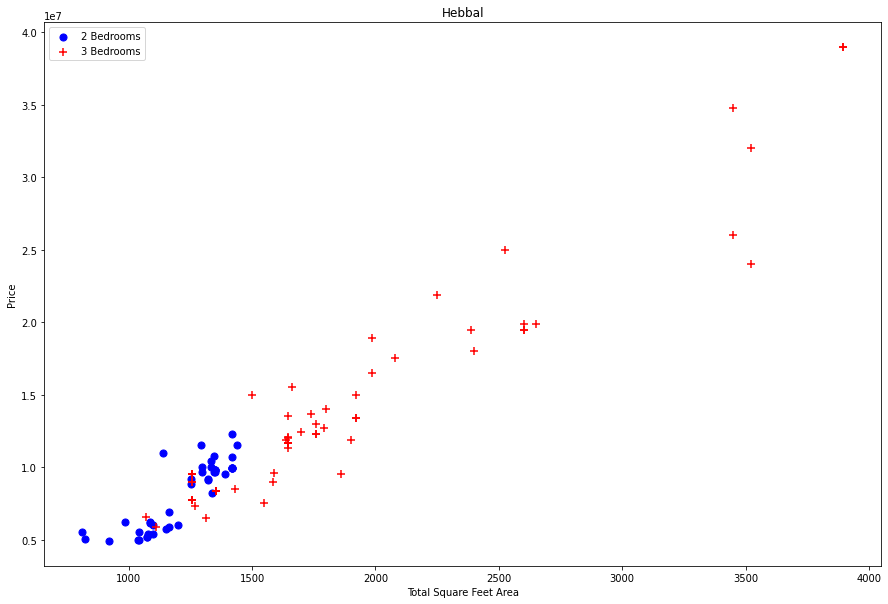

In [49]:
scatter_chart(df7,'Hebbal')

In [50]:
def remove_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bedrooms_stats={}
        for bedrooms,bedrooms_df in location_df.groupby('bedrooms'):
            bedrooms_stats['bedrooms']={
                'mean': np.mean(bedrooms_df.price_per_sqft),
                'std': np.std(bedrooms_df.price_per_sqft),
                'count': bedrooms_df.shape[0]
            }
        for bedrooms,bedrooms_df in location_df.groupby('bedrooms'):
            stats=bedrooms_stats.get(bedrooms-1)
            if stats and stats['count']>5:
                exclude_indices= np.append(exclude_indices,bedrooms_df[bedrooms_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

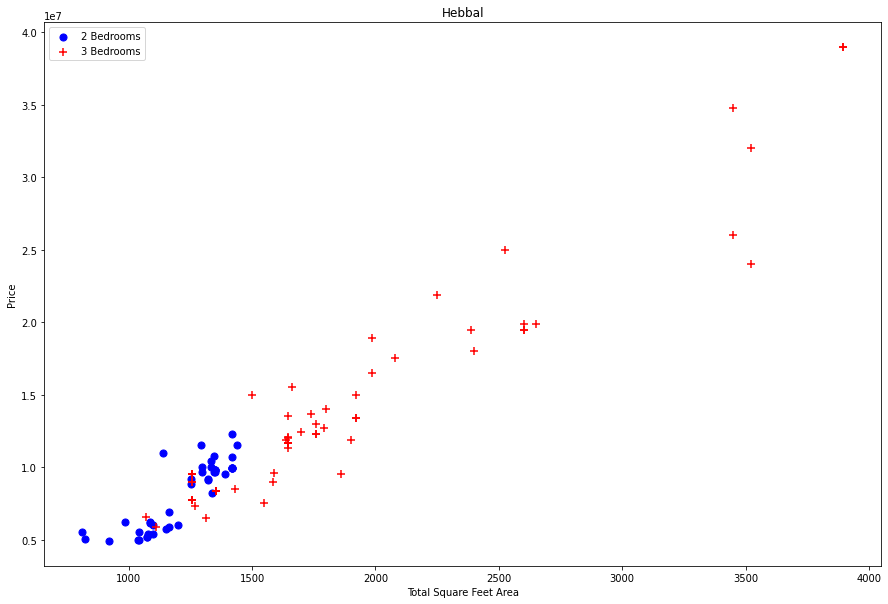

In [51]:
df8=df7.copy()
remove_outliers(df8)
scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'Count')

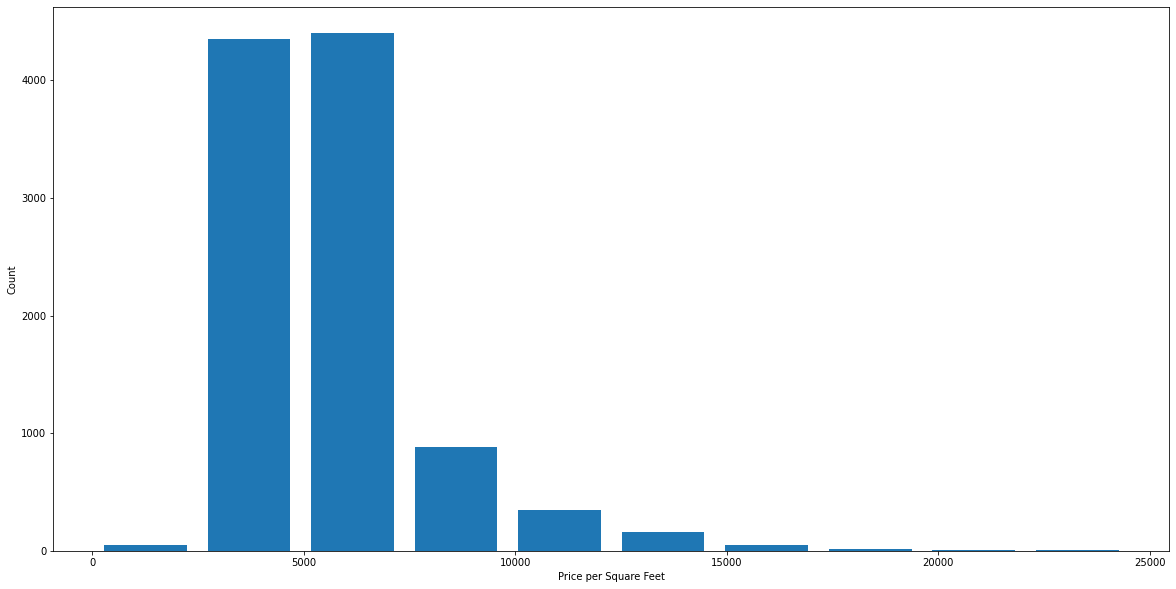

In [52]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

## Analyse the relation between the bedroom number and bathrooms numbers

Remove houses that have bathrooms 2 plus more than no. of bedrooms.

In [53]:
df8[df8.bath>(df8.bedrooms+2)]

,area_type,location,bedrooms,total_sqft,bath,balcony,price,price_per_sqft
1632,Built-up Area,Chikkabanavar,4,2460.0,7,2,8000000.0,3252.032520
5255,Built-up Area,Nagasandra,4,7000.0,8,2,45000000.0,6428.571429
5866,Super built-up Area,Other,6,11338.0,9,1,100000000.0,8819.897689
9038,Super built-up Area,Thanisandra,3,1806.0,6,2,11600000.0,6423.034330


In [54]:
df9= df8[df8.bath<(df8.bedrooms+2)]

Drop price_per_sqft

In [55]:
df9=df9.drop('price_per_sqft',axis='columns')

Convert area_type and location to numarical values

In [56]:
df10=df9.copy()
df11=pd.get_dummies(data=df10, columns=['area_type', 'location'])
df11.head(1)

,bedrooms,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,4,2850.0,4,1,42800000.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## Prepare data for training

In [57]:
X=df11.drop('price',axis='columns')
X.head()

,bedrooms,total_sqft,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,4,2850.0,4,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2,3,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y=df11.price
y.head()

0    42800000.0
1    19400000.0
2    23500000.0
3    13000000.0
4    14800000.0
Name: price, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [60]:
!pip install xgboost

In [61]:
# Import classification models from sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor

# Dictionary contains all regression algorithms that we want to train and its hyperparameters that we want to tune.
reg_algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cycle']
            }
        },
        'ridge_regression':{
            'model':Ridge(),
            'params':{
                'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]
            }
        },
        'DecisionTreeRegressor':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random'],
                'max_depth' : [10],
                'min_samples_leaf' : [2]
            }
        },
        'elastic_net':{
            'model':ElasticNet(),
            'params':{}
        },
        'SVR':{
            'model':SVR(),
            'params':{
#                 'C':[100000,0.7],
#                 'kernel' : ['rbf'],
#                 'gamma' : ['auto'],
#                 'degree':[4],
# #                 'epsilon':[0.002],
#                 'coef0':[20]
            }
        },
        'Random_Forest_Regressor':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[100,1500],
                'max_depth' : [3]
            }
        },
        'GradientBoostingRegressor':{
            'model':GradientBoostingRegressor(),
            'params':{
#                 'n_estimators':[100,1500],
#                 'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01],
#                 'random_state':[2],
#                 'max_depth':range(1,32,2), 
# #               'min_samples_split':range(200,1001,200),
# #               'min_samples_leaf':range(30,71,10),
# #               'max_features':range(0,5),
#                 'subsample':[0.6]
            }
        }
        ,
        'XGBoost Regressor':{
            'model':XGBRegressor(),
            'params':{
                'n_estimators':[100],
                'learning_rate':[0.01]
            }
        }

}

In [62]:
# Import libraries to train, evaluate and save the models.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score
import joblib

# Function carry on multitasks:
# 1- Train different types of Regression algorithms.
# 2- Hyperparameter tuning using GridSearchCV.
# 3- Evaluate each regression algorithm by diffirent types of metrices.
# 4- Make a report with best score and best Hyperparameter for each regression algorithm.
# 5- Save each trained model in pickle file using joblib.

def best_reg_model(X_train, y_train, X_test, y_test):
#     Lists to add the result in
    ml_models,model_scores,predictions=[],[],[]
#    Cross Validation
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
#     Loop on reg_algo dictionary
    for algo_name,config in reg_algos.items():
#         use GridSearchCV to tune the hyperparameteres for the algorithm
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False).fit(X_train, y_train)
#     Find y_predict
        y_pred=gs.predict(X_test)
#     Error validation functions
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r_squared = r2_score(y_test, y_pred)
        rmse_cv = np.sqrt(-cross_val_score(gs, X_train, y_train, scoring="neg_mean_squared_error", cv=5)).mean()
#         Add the scores to the lists
        model_scores.append({
                          "Model_name": algo_name,
                          "best_score":gs.best_score_,
                          "mean_absolute_error": mae,
                          "mean_squared_error": mse,
                          "root_mean_squared_error": rmse,
                          "r2_score": r_squared,
                          "RMSE_Cross_Validation": rmse_cv,
                          "best_params":gs.best_params_,
                            "best_estimator":gs.best_estimator_})
        predictions.append({"Model_name": algo_name,"y_pred":y_pred})
        joblib.dump(gs.best_estimator_, f'{algo_name}.pkl', compress = 1)
#         Save the trained model
        print(f'{algo_name} is done')        
    return pd.DataFrame(model_scores, columns=["Model_name","best_score",
                                            "mean_absolute_error",
                                            "mean_squared_error", 
                                            "root_mean_squared_error",
                                            "r2_score",
                                            "RMSE_Cross_Validation",
                                            "best_params",
                                            "best_estimator"]
                       ).sort_values(by="RMSE_Cross_Validation"
                                    ),pd.DataFrame(predictions, columns=["Model_name","y_pred"])

In [63]:
reg_model_scores,reg_predictions=best_reg_model(X_train, y_train, X_test,y_test)

linear_regression is done
lasso is done
ridge_regression is done
DecisionTreeRegressor is done
elastic_net is done
SVR is done
Random_Forest_Regressor is done
GradientBoostingRegressor is done
XGBoost Regressor is done


In [64]:
# A report with best score and best Hyperparameter for each classification algorithm.
reg_model_scores

,Model_name,best_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score,RMSE_Cross_Validation,best_params,best_estimator
2,ridge_regression,0.753882,3.846637e+06,7.076013e+15,8.411904e+07,-73.746100,3.720486e+06,{'alpha': 0.03},Ridge(alpha=0.03)
0,linear_regression,0.753530,3.846472e+06,7.072827e+15,8.410010e+07,-73.712442,3.722909e+06,{'normalize': False},LinearRegression()
1,lasso,0.753539,3.846472e+06,7.073024e+15,8.410127e+07,-73.714523,3.722970e+06,"{'alpha': 2, 'selection': 'random'}","Lasso(alpha=2, selection='random')"
7,GradientBoostingRegressor,0.772339,2.143216e+06,3.634704e+13,6.028851e+06,0.616055,3.804799e+06,{},([DecisionTreeRegressor(criterion='friedman_ms...
3,DecisionTreeRegressor,0.715814,2.274657e+06,3.233369e+13,5.686272e+06,0.658449,4.176549e+06,"{'criterion': 'mse', 'max_depth': 10, 'min_sam...","DecisionTreeRegressor(max_depth=10, min_sample..."
6,Random_Forest_Regressor,0.686488,2.523768e+06,4.285571e+13,6.546428e+06,0.547302,4.521851e+06,"{'max_depth': 3, 'n_estimators': 100}","(DecisionTreeRegressor(max_depth=3, max_featur..."
4,elastic_net,0.606566,4.709949e+06,9.489041e+15,9.741171e+07,-99.235660,4.760757e+06,{},ElasticNet()
8,XGBoost Regressor,0.452522,3.556779e+06,5.886269e+13,7.672202e+06,0.378215,5.815227e+06,"{'learning_rate': 0.01, 'n_estimators': 100}","XGBRegressor(base_score=0.5, booster='gbtree',..."
5,SVR,-0.082116,4.316489e+06,9.990356e+13,9.995177e+06,-0.055312,8.022944e+06,{},SVR()


In [65]:
# Table shows the predicted results from all trained models
reg_predictions

,Model_name,y_pred
0,linear_regression,"[4879225.839018177, 7428713.538144779, 1085033..."
1,lasso,"[4879326.781492415, 7428532.772756821, 1085112..."
2,ridge_regression,"[4880379.332840471, 7427163.278574539, 1085304..."
3,DecisionTreeRegressor,"[6315481.2, 7134682.87037037, 12579940.4761904..."
4,elastic_net,"[6635327.419884723, 7551242.682382064, 1200444..."
5,SVR,"[6699924.66181471, 6700055.234181123, 6700845...."
6,Random_Forest_Regressor,"[7008382.766039069, 7008382.766039069, 1177715..."
7,GradientBoostingRegressor,"[6270719.5214203885, 6885319.804084344, 118403..."
8,XGBoost Regressor,"[4030312.8, 4217555.5, 7711391.5, 9307855.0, 3..."


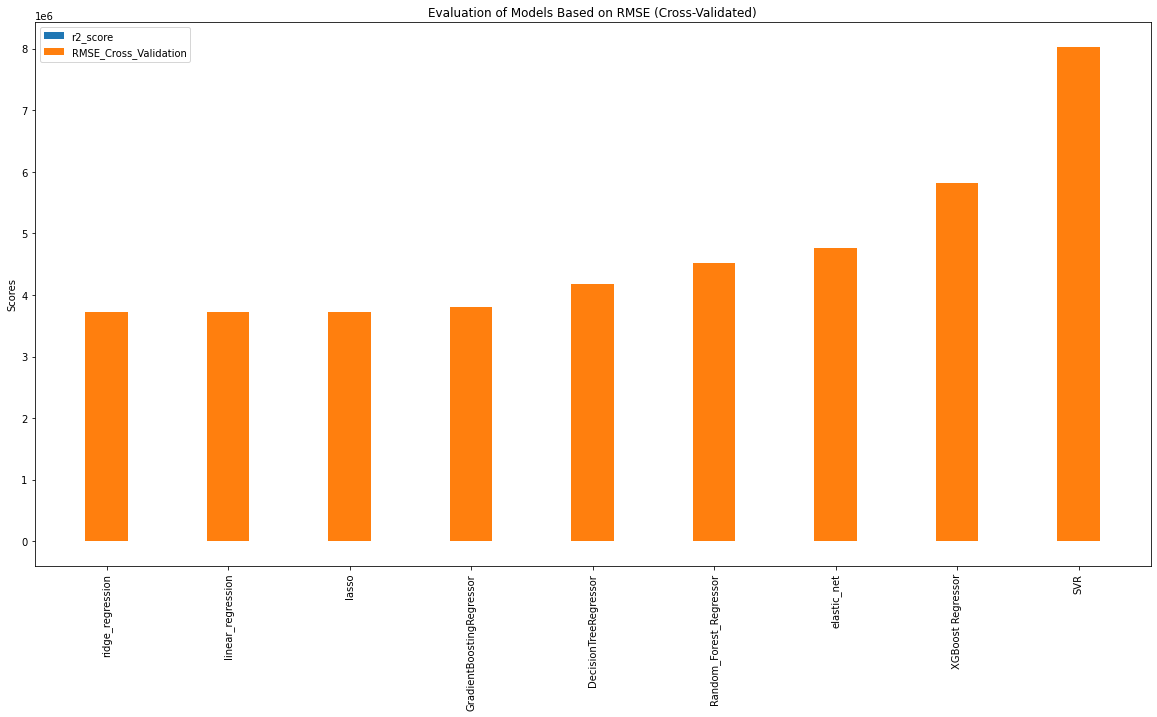

In [66]:
#  Stacked-bar chart show the r2_score and RMSE_Cross_Validation for each trained model
fig, ax = plt.subplots()
ax.bar(reg_model_scores["Model_name"], reg_model_scores["r2_score"], width = 0.35 , label='r2_score')
ax.bar(reg_model_scores["Model_name"], reg_model_scores["RMSE_Cross_Validation"],width = 0.35 , label='RMSE_Cross_Validation')
ax.set_ylabel('Scores')
plt.title("Evaluation of Models Based on RMSE (Cross-Validated)")
plt.xticks(rotation=90)
ax.legend()
plt.show()

From the models scores, the best score of all trained models is GradientBoostingRegressor.

In [72]:
reg_model_scores.iloc[3]

Model_name                                         GradientBoostingRegressor
best_score                                                          0.772339
mean_absolute_error                                           2143216.373822
mean_squared_error                                     36347038684935.390625
root_mean_squared_error                                       6028850.527666
r2_score                                                            0.616055
RMSE_Cross_Validation                                         3804799.210833
best_params                                                               {}
best_estimator             ([DecisionTreeRegressor(criterion='friedman_ms...
Name: 7, dtype: object

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
lr=GradientBoostingRegressor()
lr.fit(X_train,y_train)

GradientBoostingRegressor()

In [74]:
# Prediction function
def predict_price(area_type,location,bedrooms, total_sqft, bath, balcony):
    area_type_index=np.where(X.columns==area_type)[0][0]
    location_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=bedrooms
    x[1]=total_sqft
    x[2]=bath
    x[3]=balcony
    if area_type_index>=0:
        x[area_type_index]=1
    if location_index>=0:
        x[location_index]=1
    return lr.predict([x])[0]

In [75]:
predict_price('area_type_Plot  Area','location_Vishveshwarya Layout',4, 1200, 2, 2)

9180279.863102535

## Save the model

In [ ]:
import pickle
with open('house_price_model.pickle','wb')as f:
    pickle.dump(lr,f)